In [57]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# plotting style (any color scheme is fine, I used dark mode)
plt.style.use('dark_background')

pd.options.mode.chained_assignment = None

In [54]:
# URL page we will be scraping
url = "https://www.basketball-reference.com/teams/CLE"
html = urlopen(url)
soup = BeautifulSoup(html)

# use findALL() to get the column headers
soup.findAll('tr', limit=2)

# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

# creating the dataframe which will have all the required data
df = pd.DataFrame(player_stats, columns = headers)
df["seasons"] = 2021 - np.arange(52)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

df = df.iloc[::-1]
df.reset_index(drop=True, inplace=True)
df[:5]

,seasons,Lg,Team,W,L,W/L%,Finish,SRS,,,...,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,,Playoffs,Coaches,Top WS
0,1970,NBA,Cleveland Cavaliers,15,67,.183,4th of 4,-12.04,,,...,-4.5,92.3,-4.9,102.4,5.2,,,,B. Fitch (15-67),W. Wesley (4.1)
1,1971,NBA,Cleveland Cavaliers,23,59,.280,4th of 4,-7.90,,,...,-0.5,94.5,-3.4,101.4,3.5,,,,B. Fitch (23-59),B. Beard (5.9)
2,1972,NBA,Cleveland Cavaliers,32,50,.390,4th of 4,-2.64,,,...,-2.4,94.0,-2.8,96.5,-0.3,,,,B. Fitch (32-50),L. Wilkens (9.5)
3,1973,NBA,Cleveland Cavaliers,29,53,.354,4th of 4,-4.16,,,...,-3.7,96.0,-1.7,100.1,2.4,,,,B. Fitch (29-53),L. Wilkens (6.5)
4,1974,NBA,Cleveland Cavaliers,40,42,.488,3rd of 5,-0.31,,,...,-4.1,97.6,-0.1,98.0,0.3,,,,B. Fitch (40-42),D. Snyder (6.4)


 # Win Share bar plots

In [55]:
# cleaning the data of win share leaders (Top WS column in our dataframe)
player_names = []
player_ws = []
for c in df['Top WS']:
#     print(c.split()[2].strip('()'), c.split()[:2])
    d = c.split()[0] + c.split()[1] 
    player_ws += [c.split()[2].strip('()')]
    player_names += [d]
player_ws = np.array(player_ws, dtype=float)
print(player_names, player_ws)
player_names = np.array(player_names)
df['WS'] = player_ws
df['WS player'] = player_names

print(len(np.unique(player_names)))

['W.Wesley', 'B.Beard', 'L.Wilkens', 'L.Wilkens', 'D.Snyder', 'J.Brewer', 'J.Chones', 'E.Smith', 'C.Russell', 'D.Robisch', 'M.Mitchell', 'J.Edwards', 'W.Free', 'W.Free', 'W.Free', 'R.Hinson', 'H.Williams', 'M.Price', 'M.Price', 'M.Price', 'L.Nance', 'L.Nance', 'B.Daugherty', 'M.Price', 'T.Hill', 'T.Brandon', 'T.Brandon', 'W.Person', 'S.Kemp', 'A.Miller', 'C.Weatherspoon', 'A.Miller', 'C.Boozer', 'C.Boozer', 'L.James', 'L.James', 'L.James', 'L.James', 'L.James', 'L.James', 'R.Sessions', 'K.Irving', 'K.Irving', 'K.Irving', 'K.Irving', 'L.James', 'L.James', 'L.James', 'L.Nance', 'L.Nance', 'J.Allen', 'J.Allen'] [ 4.1  5.9  9.5  6.5  6.4  7.9  5.9  6.8  6.7  8.6  6.   4.3  4.6  5.3
  6.   7.4  7.5  7.8 11.3 10.1  9.8 12.2 12.7 10.   6.9 12.7 10.8 10.3
  6.3  5.3  8.6 10.3  5.9  9.4 14.3 16.3 13.7 15.2 20.3 18.5  4.4  4.1
  5.3  6.7 10.4 13.6 12.9 14.   4.9  3.9  5.   2.6]
28


## TODO: make graphs aesthetic (check seaborn documentation and examples)

### Win share frequency plot to display the number of times a player was the team leader in win shares

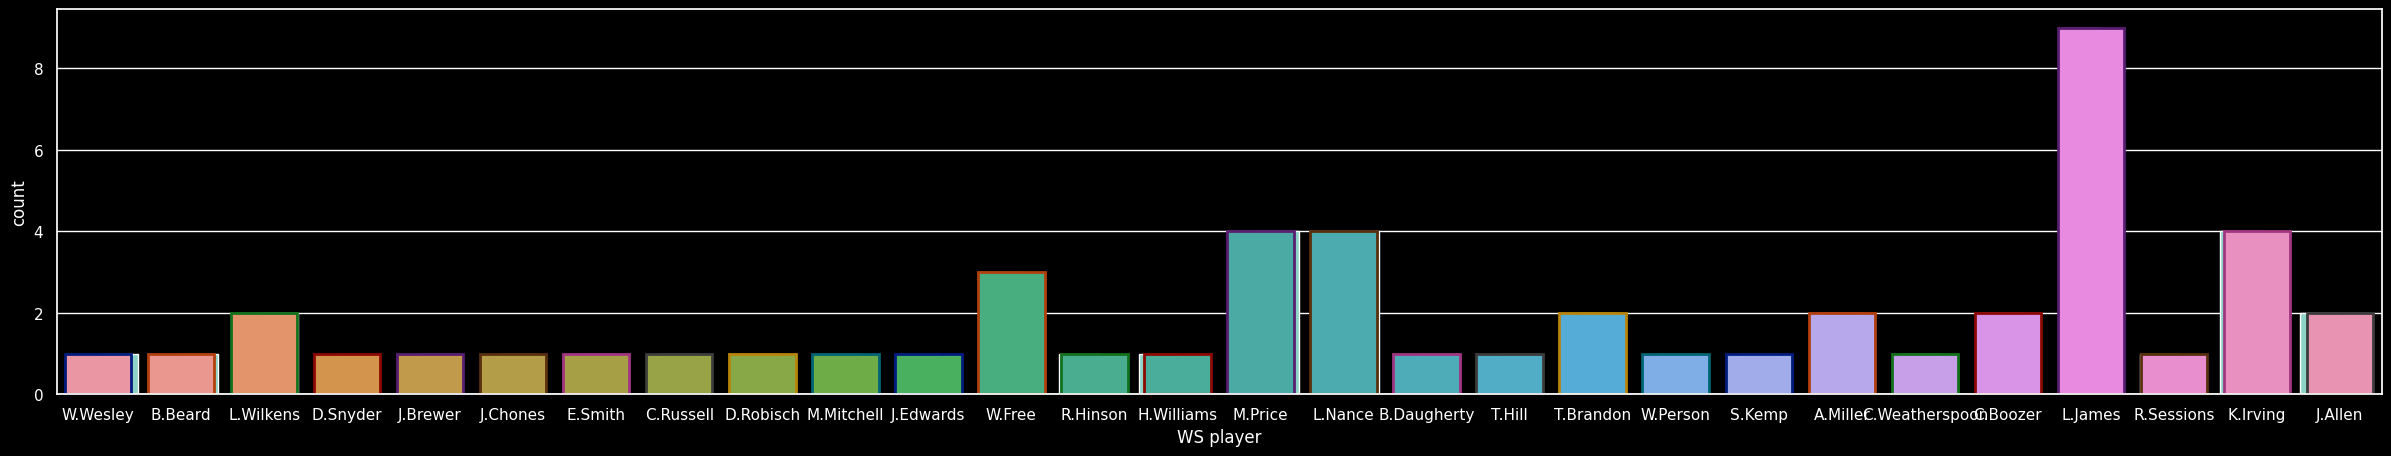

28


In [46]:
plt.hist(df['WS player'], bins=len(np.unique(player_names))*2)
plt.rcParams['figure.figsize'] = [20, 5]
sns.countplot(x="WS player", data=df, linewidth=2, edgecolor=sns.color_palette("dark", 28))
plt.show()

# TODO: show the mean win share of the win share leaders 

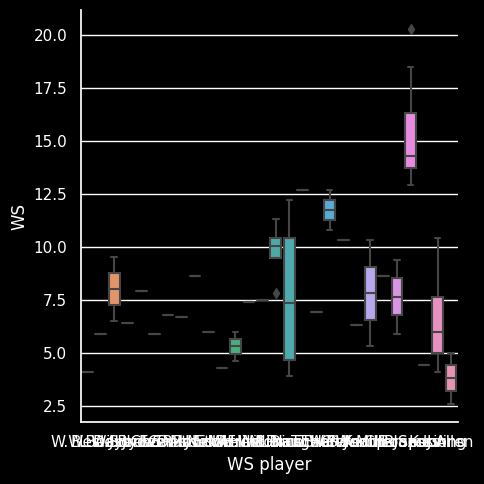

In [47]:
sns.catplot(x="WS player", y="WS", kind="box", data=df)
plt.show()

## Splitting data into two subsets: 
## i) Seasons LBJ played for Cavs
## ii) Seasons LBJ didn't play for Cavs

In [56]:
# converting data into numeric form as it is text by default
numeric_cols = ['W', 'L', 'W/L%', 'SRS', 'Pace', 'Rel Pace', 'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], downcast="float")

In [50]:
# indices of the seasons lbj played for cavs
A = np.array([33, 34, 35, 36, 37, 38, 39, 44, 45, 46, 47])

# indices of the seasons lbj didn't play for cavs
B = np.arange(52)
B = np.array([i for i in B if i not in A])

dfa = df.loc[A, :]
dfb = df.loc[B, :]

# Analysis of team stats

## 1. LeBron's impact on Win Percentage

In [51]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'W/L%'

mean_stat_with_lebron = np.mean(dfa[stat_name])
mean_stat_without_lebron = np.mean(dfb[stat_name])
print(mean_stat_with_lebron, mean_stat_without_lebron)

print(mannwhitneyu(dfa[stat_name], dfb[stat_name]))
print(ttest_ind(dfa[stat_name], dfb[stat_name]))

0.62090915 0.41551217
MannwhitneyuResult(statistic=52.5, pvalue=5.4845212658726824e-05)
Ttest_indResult(statistic=4.641264634360636, pvalue=2.532800318634137e-05)


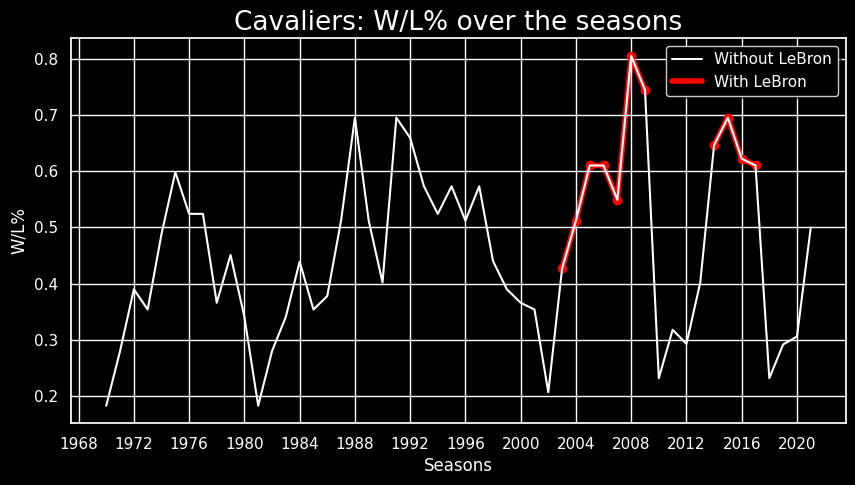

In [60]:
# size of the plot
plt.rcParams['figure.figsize'] = [10, 5]

# to manipulate intervals by which years are displayed (default: 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.plot(df['seasons'], df[stat_name], color='white')
plt.scatter(df['seasons'][33:40], df[stat_name][33:40], color='#ff0000')
plt.scatter(df['seasons'][44:48], df[stat_name][44:48], color='#ff0000')
plt.plot(df['seasons'][33:40], df[stat_name][33:40], color='#ff0000', lw=4, zorder=-1)
plt.plot(df['seasons'][44:48], df[stat_name][44:48], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without LeBron', 'With LeBron'])
plt.xlabel("Seasons")
plt.ylabel("{}".format(stat_name))
plt.title("Cavaliers: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.5)

plt.show()